## Docs

In [38]:
%%capture
!pip3 install -e ../

### Frequency Tokenizer

In [1]:
import tkseem as tk

Read, preprocess then train

In [2]:
tokenizer = tk.WordTokenizer()
tokenizer.train('samples/data.txt')

Training WordTokenizer ...


In [3]:
print(tokenizer.name)

WordTokenizer


Tokenize 

In [4]:
tokenizer.tokenize("السلام عليكم")

['السلام', 'عليكم']

In [5]:
tokenizer._tokenize_word("السلام")

['السلام']

Encode as ids

In [6]:
encoded = tokenizer.encode("السلام عليكم")
print(encoded)

[560, 801]


Decode back to tokens

In [7]:
decoded = tokenizer.decode(encoded)
print(decoded)

['السلام', 'عليكم']


In [8]:
detokenized = tokenizer.detokenize(decoded)
print(detokenized)

السلام عليكم


In [9]:
encodings = tokenizer.encode_sentences(["السلام", "عليكم"], add_boundry=True, out_length=10)
encodings

[[3, 560, 4, 0, 0, 0, 0, 0, 0, 0], [3, 801, 4, 0, 0, 0, 0, 0, 0, 0]]

In [10]:
decodings = tokenizer.decode_sentences(encodings)
decodings

['السلام', 'عليكم']

### SentencePiece Tokenizer

Read, preprocess then train

In [11]:
tokenizer = tk.SentencePieceTokenizer()
tokenizer.train('samples/data.txt')

Training SentencePiece ...


Tokenize 

In [12]:
tokenizer.tokenize("صباح الخير يا أصدقاء")

['▁صباح', '▁الخير', '▁يا', '▁أص', 'د', 'قاء']

Encode as ids

In [13]:
encoded = tokenizer.encode("السلام عليكم")
print(encoded)

[1801, 2743]


Decode back to tokens

In [14]:
decoded = tokenizer.decode(encoded)
print(decoded)

['▁السلام', '▁عليكم']


In [15]:
detokenized = tokenizer.detokenize(decoded)
print(detokenized)

السلام عليكم


In [16]:
encodings = tokenizer.encode_sentences(["السلام عليكم", "أهلا وسهلا"], add_boundry=True, out_length=10)
encodings

[[3, 1801, 2743, 4, 0, 0, 0, 0, 0, 0], [3, 3024, 325, 3042, 4, 0, 0, 0, 0, 0]]

In [17]:
decodings = tokenizer.decode_sentences(encodings)
decodings

['السلام عليكم', 'أهلا وسهلا']

### Morphological Tokenizer

Read, preprocess then train

In [19]:
tokenizer = tk.MorphologicalTokenizer()
tokenizer.train()

Training MorphologicalTokenizer ...


Tokenize 

In [20]:
tokenizer.tokenize("السلام عليكم")

['ال', '##سلام', 'علي', '##كم']

Encode as ids

In [21]:
encoded = tokenizer.encode("السلام عليكم")
print(encoded)

[5, 370, 767, 187]


Decode back to tokens

In [22]:
decoded = tokenizer.decode(encoded)
print(decoded)

['ال', '##سلام', 'علي', '##كم']


In [23]:
encodings = tokenizer.encode_sentences(["السلام", "عليكم"], add_boundry=True, out_length=10)
encodings

[[3, 5, 370, 4, 0, 0, 0, 0, 0, 0], [3, 767, 187, 4, 0, 0, 0, 0, 0, 0]]

In [24]:
tokenizer.decode_sentences(encodings)

['السلام', 'عليكم']

### Random Tokenizer

In [25]:
tokenizer = tk.RandomTokenizer()
tokenizer.train('samples/data.txt')

Training RandomTokenizer ...


In [26]:
tokenizer.tokenize("السلام عليكم أيها الأصدقاء")

['السلا', '##م', 'علي', '##كم', 'أي', '##ها', 'الأص', '##دقا', '##ء']

### Disjoint Letter Tokenizer

In [27]:
tokenizer = tk.DisjointLetterTokenizer()
tokenizer.train('samples/data.txt')

Training DisjointLetterTokenizer ...


In [28]:
print(tokenizer.tokenize("السلام عليكم أيها الأصدقاء"))

['ا', '##لسلا', '##م', 'عليكم', 'أ', '##يها', 'ا', '##لأ', '##صد', '##قا', '##ء']


### Character Tokenizer

In [29]:
tokenizer = tk.CharacterTokenizer()
tokenizer.train('samples/data.txt')

Training CharacterTokenizer ...


In [30]:
tokenizer.tokenize("السلام عليكم")

['ا', '##ل', '##س', '##ل', '##ا', '##م', 'ع', '##ل', '##ي', '##ك', '##م']

### BruteForce Tokenizer

In [31]:
tokenizer = tk.BruteForceTokenizer()
tokenizer.train('samples/data.txt')

Training RandomTokenizer ...


In [34]:
tokenizer.tokenize("السلام عليكم")

['السلام', 'عليكم']

### Compression Factor

In [35]:
import tkseem as tk

In [36]:
tokenizer = tk.WordTokenizer()
tokenizer.train('samples/data.txt')
tokenizer.tokenize('السلام عليكم')
tokenizer.calculate_compression_factor('السلام عليكم')

Training WordTokenizer ...


0.15384615384615385

Training WordTokenizer ...
Training SentencePiece ...
Training RandomTokenizer ...
Training DisjointLetterTokenizer ...
Training CharacterTokenizer ...
Training MorphologicalTokenizer ...


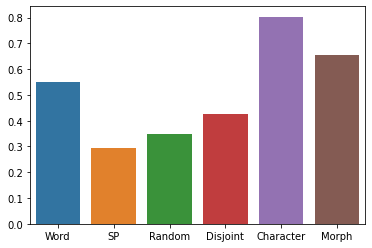

In [39]:
import seaborn as sns
import pandas as pd
import time 
import tkseem as tk

def calc_comp(fun):
    tokenizer = fun()
    # morph tokenizer doesn't take arguments
    if str(tokenizer) == 'MorphologicalTokenizer':
        tokenizer.train()
    else:
        tokenizer.train('samples/data.txt')
    text = open('samples/data.txt', 'r').read()
    return tokenizer.calculate_compression_factor(text)

factors = {}

factors['Word'] = calc_comp(tk.WordTokenizer)
factors['SP'] = calc_comp(tk.SentencePieceTokenizer)
factors['Random'] = calc_comp(tk.RandomTokenizer)
factors['Disjoint'] = calc_comp(tk.DisjointLetterTokenizer)
factors['Character'] = calc_comp(tk.CharacterTokenizer)
factors['Morph'] = calc_comp(tk.MorphologicalTokenizer)
plt = sns.barplot(data = pd.DataFrame.from_dict([factors]))

### Export Models

Models can be saved for deployment and reloading.

In [41]:
tokenizer = tk.WordTokenizer()
tokenizer.train('samples/data.txt')
tokenizer.save(file_path = ".", name = 'm')

Training WordTokenizer ...


load model without pretraining

In [44]:
tokenizer = tk.WordTokenizer()
tokenizer.load(file_path = ".", name ='m')

In [45]:
tokenizer.tokenize('السلام عليكم')

['السلام', 'عليكم']

### Benchmarking

Comparing tokenizers in terms of training time

Training WordTokenizer ...
Training SentencePiece ...
Training RandomTokenizer ...
Training DisjointLetterTokenizer ...
Training CharacterTokenizer ...
Training MorphologicalTokenizer ...


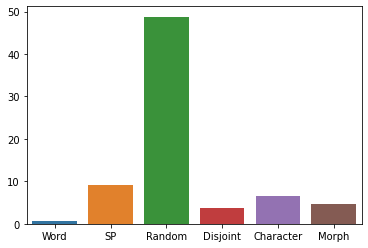

In [27]:
import seaborn as sns
import pandas as pd
import time 

def calc_time(fun):
    tokenizer = fun()
    start_time = time.time()
    # morph tokenizer doesn't take arguments
    if str(tokenizer) == 'MorphologicalTokenizer':
        tokenizer.train()
    else:
        tokenizer.train('samples/data.txt')
    return time.time() - start_time

running_times = {}

running_times['Word'] = calc_time(tk.WordTokenizer)
running_times['SP'] = calc_time(tk.SentencePieceTokenizer)
running_times['Random'] = calc_time(tk.RandomTokenizer)
running_times['Disjoint'] = calc_time(tk.DisjointLetterTokenizer)
running_times['Character'] = calc_time(tk.CharacterTokenizer)
running_times['Morph'] = calc_time(tk.MorphologicalTokenizer)
plt = sns.barplot(data = pd.DataFrame.from_dict([running_times]))

comparing tokenizers in tokenization time

Training WordTokenizer ...
Training SentencePiece ...
Training RandomTokenizer ...
Training DisjointLetterTokenizer ...
Training CharacterTokenizer ...
Training MorphologicalTokenizer ...


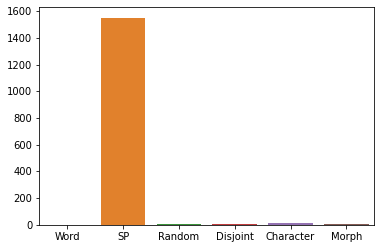

In [28]:
import seaborn as sns
import pandas as pd
import time 

def calc_time(fun):
    tokenizer = fun()
    # morph tokenizer doesn't take arguments
    if str(tokenizer) == 'MorphologicalTokenizer':
        tokenizer.train()
    else:
        tokenizer.train('samples/data.txt')
    start_time = time.time()
    tokenizer.tokenize(open('samples/data.txt', 'r').read())
    return time.time() - start_time

running_times = {}

running_times['Word'] = calc_time(tk.WordTokenizer)
running_times['SP'] = calc_time(tk.SentencePieceTokenizer)
running_times['Random'] = calc_time(tk.RandomTokenizer)
running_times['Disjoint'] = calc_time(tk.DisjointLetterTokenizer)
running_times['Character'] = calc_time(tk.CharacterTokenizer)
running_times['Morph'] = calc_time(tk.MorphologicalTokenizer)
plt = sns.barplot(data = pd.DataFrame.from_dict([running_times]))

### Caching

Caching is used for speeding up the tokenization process. 

In [32]:
import tkseem as tk
tokenizer = tk.MorphologicalTokenizer()
tokenizer.train()

Training MorphologicalTokenizer ...


In [33]:
%%timeit
out = tokenizer.tokenize(open('samples/data.txt', 'r').read(), use_cache = False)

8.82 s ± 277 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
%%timeit
out = tokenizer.tokenize(open('samples/data.txt', 'r').read(), use_cache = True, max_cache_size = 10000)

7.14 s ± 296 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
